In [1]:
from sklearn import metrics

import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from reduce_model import ReduceModel, AE, VAE

In [2]:
nn = ReduceModel(layers=(990, 572, 286, 143, 72, 36, 18, 9, 5))

In [3]:
nn.train(100)

100%|██████████| 100/100 [01:02<00:00,  1.59it/s]

Epoch 100, Train Loss: 0.00013226958710516176
Epoch 100, Validation Loss: 0.00012951732986204496


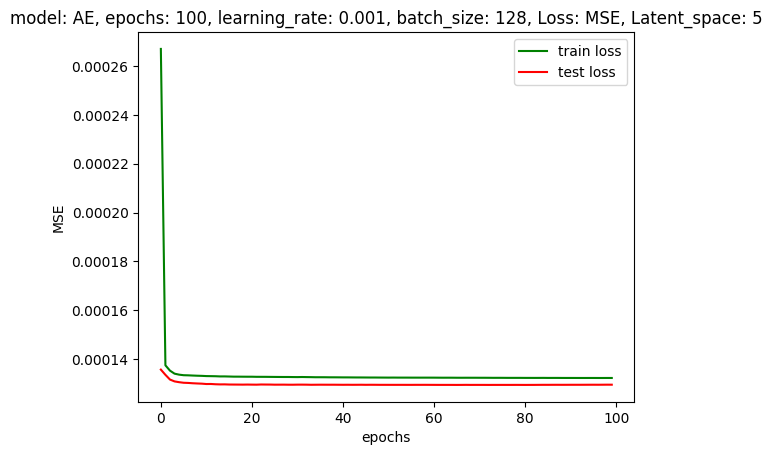

In [4]:
nn.plot_loss()

In [5]:
test = pd.read_csv("../qmof_datasets/normalizer/small_test.csv", index_col=0)
train = pd.read_csv("../qmof_datasets/normalizer/small_train.csv", index_col=0)

In [6]:
test_reduced = pd.DataFrame(nn.transform(test))

In [7]:
corr_matrix = pd.DataFrame(columns=test_reduced.columns)

for c in test.columns:
    row = [0.]*5
    for j in range(5):
        row[j] = np.corrcoef(test[c], test_reduced[j])[0, 1]
        if np.isnan(row[j]):
            print(c)
    corr_matrix.loc[c] = row

In [11]:
corr_matrix

,0,1,2,3,4
pld,-0.095250,-0.055520,0.285267,-0.356572,0.248289
lcd,-0.131091,-0.061995,0.374148,-0.440013,0.354445
a,-0.242670,0.030859,0.413887,-0.426138,0.542682
b,-0.254642,0.049826,0.390270,-0.399786,0.544814
c,-0.249760,0.058183,0.360044,-0.363486,0.526153
...,...,...,...,...,...
Atomic_Weight,-0.280559,0.135575,0.253878,-0.239186,0.495458
Atomic Radius,-0.309357,0.136993,0.293351,-0.291147,0.551173
Mulliken EN,-0.299904,0.123551,0.308373,-0.302370,0.554534
polarizability(A^3),-0.268917,0.139959,0.191251,-0.198175,0.433937


In [8]:
import matplotlib.pyplot as plt

In [14]:
max_corr = corr_matrix[corr_matrix.abs() > 0.1].dropna()

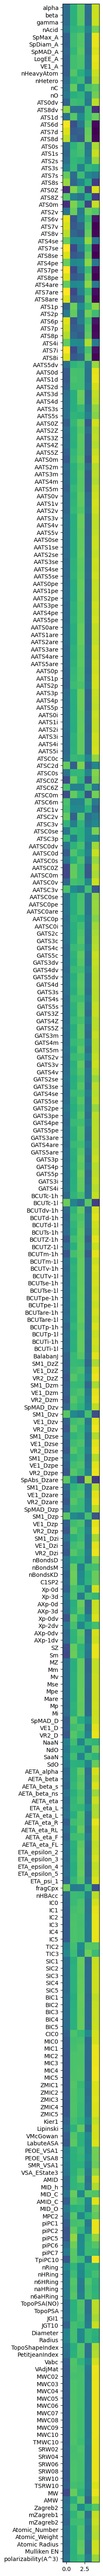

In [15]:

fig, ax = plt.subplots(1, 1,figsize=(5, 5*16))

ax.imshow(max_corr.values)
t = ax.set_yticks(range(len(max_corr)), max_corr.index)